# Q1




50
101
105
256


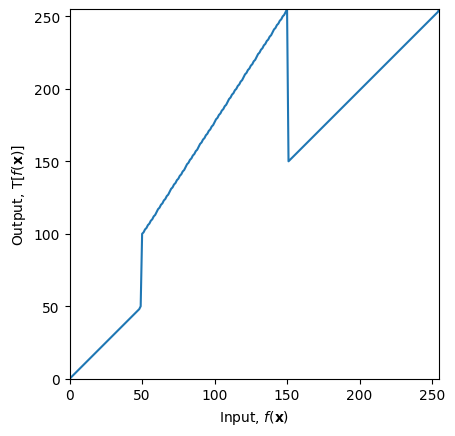

In [1]:

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
c = np.array([(50, 50),(50, 100),(150, 255),(150,150),(255,255)])
t1 = np.linspace(0,50,50).astype(np.uint8)
print(len(t1))
t2 = np.linspace(100,255,100+1).astype(np.uint8)
print(len(t2))
t3 = np.linspace(150,255,105).astype(np.uint8)
print(len(t3))
transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
print(len(transform))
fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0 ,255)
ax.set_ylim(0 ,255)
ax.set_aspect('equal')
plt.savefig('transform.png')
plt.show( )
img_orig = cv.imread('C:/Users/Dell/.ipython/emma.jpg' , cv . IMREAD_GRAYSCALE)
cv . namedWindow("Image" , cv .WINDOW_AUTOSIZE)
cv . imshow("Image" , img_orig)
cv . waitKey (0)
image_transformed = cv.LUT(img_orig , transform)
cv . imshow("Image", image_transformed)
cv . waitKey (0)
cv . destroyAllWindows ()


# Q2

# (a)

181
55
20
256


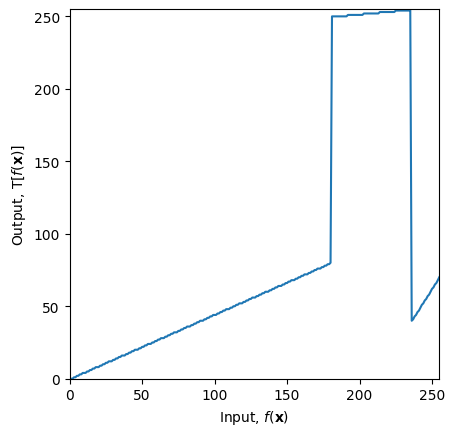

In [3]:

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

t1 = np.linspace(0,80,180+1).astype(np.uint8)
print(len(t1))
t2 = np.linspace(250,255,55).astype(np.uint8)
print(len(t2))
t3 = np.linspace(40,70,20).astype(np.uint8)
print(len(t3))
transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
print(len(transform))
fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0 ,255)
ax.set_ylim(0 ,255)
ax.set_aspect('equal')
plt.savefig('transform.png')
plt.show( )
img_orig = cv.imread('C:/Users/Dell/.ipython/brain.png' , cv . IMREAD_GRAYSCALE)
cv . namedWindow("Image" , cv .WINDOW_AUTOSIZE)
cv . imshow("Image" , img_orig)
cv . waitKey (0)
image_transformed = cv.LUT(img_orig , transform)
cv . imshow("Image with white matter ", image_transformed)
cv . waitKey (0)
cv . destroyAllWindows ()



# (b)

121
48
87
256


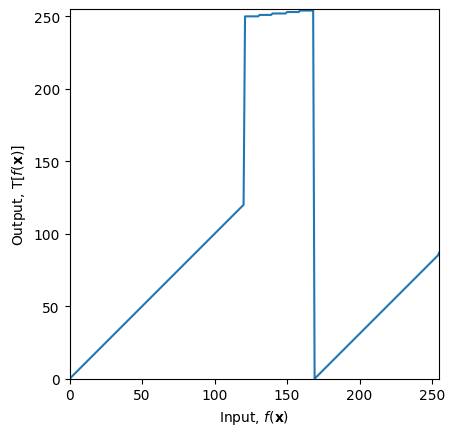

In [61]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

t1 = np.linspace(0,120,120+1).astype(np.uint8)
print(len(t1))
t2 = np.linspace(250,255,48).astype(np.uint8)
print(len(t2))
t3 = np.linspace(0,87,87).astype(np.uint8)
print(len(t3))
transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
print(len(transform))
fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0 ,255)
ax.set_ylim(0 ,255)
ax.set_aspect('equal')
plt.savefig('transform.png')
plt.show( )
img_orig = cv.imread('C:/Users/Dell/.ipython/brain.png' , cv . IMREAD_GRAYSCALE)
cv . namedWindow("Image" , cv .WINDOW_AUTOSIZE)
cv . imshow("Image" , img_orig)
cv . waitKey (0)
image_transformed = cv.LUT(img_orig , transform)
cv . imshow("Image with gray matter ", image_transformed)
cv . waitKey (0)
cv . destroyAllWindows ()


# Q3

gamma taken as 2.2

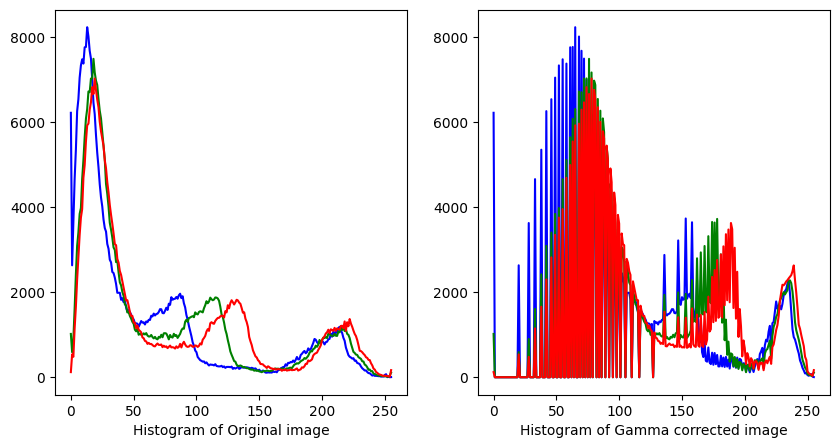

In [40]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def gammaCorrection(src, gamma):
    invGamma = 1 / gamma

    table = [((i / 255) ** invGamma) * 255 for i in range(256)]
    table = np.array(table, np.uint8)

    return cv.LUT(src, table)


img = cv.imread('C:/Users/Dell/.ipython/highlights_and_shadows.jpg')
gammaImg = gammaCorrection(img, 2.2)

hist_b = cv.calcHist([img],[0], None, [256], [0,256])
hist_g = cv.calcHist([img],[1], None, [256], [0,256])
hist_r = cv.calcHist([img],[2], None, [256], [0,256])

c_hist_b = cv.calcHist([gammaImg],[0], None, [256], [0,256])
c_hist_g = cv.calcHist([gammaImg],[1], None, [256], [0,256])
c_hist_r = cv.calcHist([gammaImg],[2], None, [256], [0,256])

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].plot(hist_b, 'b')
ax[0].plot(hist_g, 'g')
ax[0].plot(hist_r, 'r')
ax[0].set_xlabel('Histogram of Original image',fontsize=10)
ax[1].plot(c_hist_b, 'b')
ax[1].plot(c_hist_g, 'g')
ax[1].plot(c_hist_r, 'r')
ax[1].set_xlabel('Histogram of Gamma corrected image',fontsize=10)
cv.imshow('Original image', img)
cv.imshow('Gamma corrected image', gammaImg)
cv.waitKey(0)
cv.destroyAllWindows()

# Q4

-1

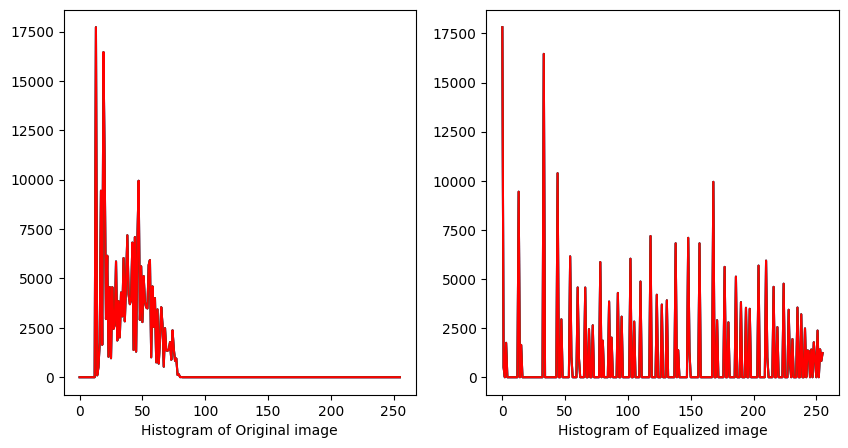

In [39]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
 
img = cv.imread('C:/Users/Dell/.ipython/shells.png')

img_yuv = cv.cvtColor(img,cv.COLOR_BGR2YUV)

# apply histogram equalization 
img_yuv[:,:,0] = cv.equalizeHist(img_yuv[:,:,0])
hist_eq = cv.cvtColor(img_yuv, cv.COLOR_YUV2BGR)

hist_b = cv.calcHist([img],[0], None, [256], [0,256])
hist_g = cv.calcHist([img],[1], None, [256], [0,256])
hist_r = cv.calcHist([img],[2], None, [256], [0,256])

eq_hist_b = cv.calcHist([hist_eq],[0], None, [256], [0,256])
eq_hist_g = cv.calcHist([hist_eq],[1], None, [256], [0,256])
eq_hist_r = cv.calcHist([hist_eq],[2], None, [256], [0,256])


fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].plot(hist_b, 'b')
ax[0].plot(hist_g, 'g')
ax[0].plot(hist_r, 'r')
ax[0].set_xlabel('Histogram of Original image',fontsize=10)
ax[1].plot(eq_hist_b, 'b')
ax[1].plot(eq_hist_g, 'g')
ax[1].plot(eq_hist_r, 'r')
ax[1].set_xlabel('Histogram of Equalized image',fontsize=10)
cv.imshow("Equalized Histogram", np.hstack((img, hist_eq)))
cv.waitKey(0)

# Q5

# (a)

In [49]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
 
im = cv.imread('C:/Users/Dell/.ipython/im01small.png', cv.IMREAD_REDUCED_GRAYSCALE_2)

scale = 4
rows = int(scale*im.shape[0])
cols = int(scale*im.shape[1])

zoomed = np.zeros((rows,cols), dtype=im.dtype)
for i in range(0, rows):
    for j in range(0, cols):
        zoomed[i,j] = im[int(i/scale), int(j/scale)]

    
cv.namedWindow('Original', cv.WINDOW_AUTOSIZE)
cv.imshow('Original', im)
cv.waitKey(0)
cv.namedWindow('Zoomed', cv.WINDOW_AUTOSIZE)
cv.imshow('Zoomed', zoomed)
cv.waitKey(0)
cv.destroyAllWindows()


# (b)

In [51]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
 
im = cv.imread('C:/Users/Dell/.ipython/im01small.png', cv.IMREAD_REDUCED_GRAYSCALE_2)

bilinear_img = cv.resize(im,None, fx = 4, fy = 4, interpolation = cv.INTER_LINEAR)

cv.namedWindow('Original', cv.WINDOW_AUTOSIZE)
cv.imshow('Original', im)
cv.waitKey(0)
cv.namedWindow('Zoomed', cv.WINDOW_AUTOSIZE)
cv.imshow('Zoomed', bilinear_img)
cv.waitKey(0)
cv.destroyAllWindows()

# Q6 

# (a)

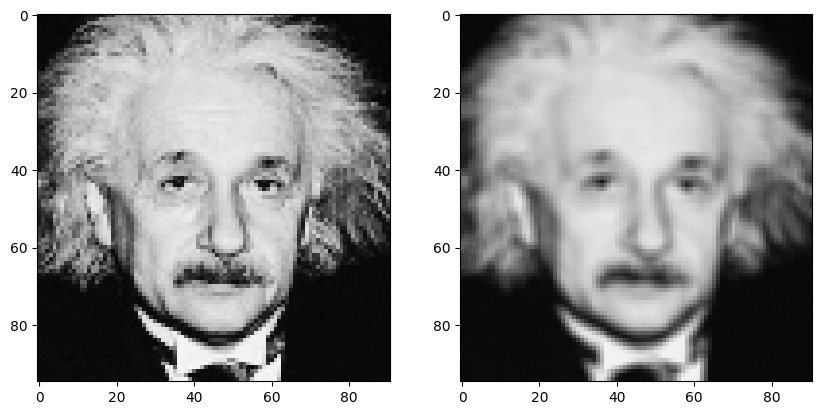

In [64]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im = cv.imread('C:/Users/Dell/.ipython/einstein.png', cv.IMREAD_REDUCED_GRAYSCALE_4)
assert im is not None

kernel = np.ones((3,3), np.float32)/9.
result = cv.filter2D(im, -1, kernel)

fig, ax = plt.subplots(1,2, figsize=(10,20))
ax[0].imshow(im, cmap='gray', vmin=0, vmax=255)
ax[1].imshow(result, cmap='gray', vmin=0, vmax=255)

plt.show()


# (b)

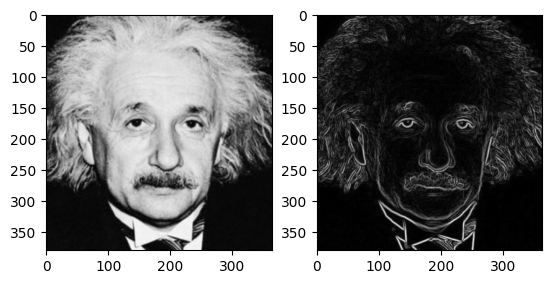

In [60]:
import numpy as np
from matplotlib.image import imread
from scipy import ndimage
import matplotlib.pyplot as plt

# Here we read the image and bring it as an array
original_image = imread('C:/Users/Dell/.ipython/einstein.png')

# Next we apply the Sobel filter in the x and y directions to then calculate the output image
dx, dy = ndimage.sobel(original_image, axis=0), ndimage.sobel(original_image, axis=1)
sobel_filtered_image = np.hypot(dx, dy)  # is equal to ( dx ^ 2 + dy ^ 2 ) ^ 0.5
sobel_filtered_image = sobel_filtered_image / np.max(sobel_filtered_image)  # normalization step

# Display and compare input and output images
fig = plt.figure(1)
ax1, ax2 = fig.add_subplot(121), fig.add_subplot(122)
ax1.imshow(original_image)
ax2.imshow(sobel_filtered_image, cmap=plt.get_cmap('gray'))
plt.show()

# (c)

C:\Users\Dell\AppData\Local\Temp\ipykernel_9848\3465997063.py:27: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()
C:\Users\Dell\AppData\Local\Temp\ipykernel_9848\3465997063.py:62: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


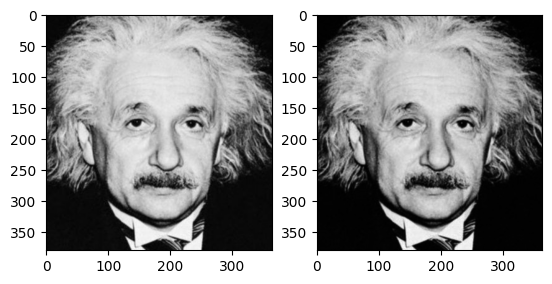

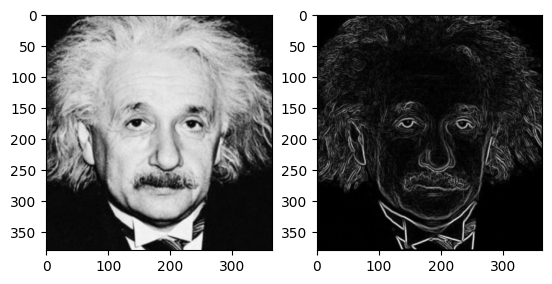

In [63]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

# #---------------------------------------------------------------------------------------------------------------------
# PART I - Transforming an image from color to grayscale
# #---------------------------------------------------------------------------------------------------------------------

# Here we import the image file as an array of shape (nx, ny, nz)
image_file = 'C:/Users/Dell/.ipython/einstein.png'
input_image = imread(image_file)  # this is the array representation of the input image
[nx, ny, nz] = np.shape(input_image)  # nx: height, ny: width, nz: colors (RGB)

# Extracting each one of the RGB components
r_img, g_img, b_img = input_image[:, :, 0], input_image[:, :, 1], input_image[:, :, 2]

# The following operation will take weights and parameters to convert the color image to grayscale
gamma = 1.400  # a parameter
r_const, g_const, b_const = 0.2126, 0.7152, 0.0722  # weights for the RGB components respectively
grayscale_image = r_const * r_img ** gamma + g_const * g_img ** gamma + b_const * b_img ** gamma

# This command will display the grayscale image alongside the original image
fig1 = plt.figure(1)
ax1, ax2 = fig1.add_subplot(121), fig1.add_subplot(122)
ax1.imshow(input_image)
ax2.imshow(grayscale_image, cmap=plt.get_cmap('gray'))
fig1.show()

# #---------------------------------------------------------------------------------------------------------------------
# PART II - Applying the Sobel operator
# #---------------------------------------------------------------------------------------------------------------------

"""
The kernels Gx and Gy can be thought of as a differential operation in the "input_image" array in the directions x and y 
respectively. These kernels are represented by the following matrices:
      _               _                   _                _
     |                 |                 |                  |
     | 1.0   0.0  -1.0 |                 |  1.0   2.0   1.0 |
Gx = | 2.0   0.0  -2.0 |    and     Gy = |  0.0   0.0   0.0 |
     | 1.0   0.0  -1.0 |                 | -1.0  -2.0  -1.0 |
     |_               _|                 |_                _|
"""

# Here we define the matrices associated with the Sobel filter
Gx = np.array([[1.0, 0.0, -1.0], [2.0, 0.0, -2.0], [1.0, 0.0, -1.0]])
Gy = np.array([[1.0, 2.0, 1.0], [0.0, 0.0, 0.0], [-1.0, -2.0, -1.0]])
[rows, columns] = np.shape(grayscale_image)  # we need to know the shape of the input grayscale image
sobel_filtered_image = np.zeros(shape=(rows, columns))  # initialization of the output image array (all elements are 0)

# Now we "sweep" the image in both x and y directions and compute the output
for i in range(rows - 2):
    for j in range(columns - 2):
        gx = np.sum(np.multiply(Gx, grayscale_image[i:i + 3, j:j + 3]))  # x direction
        gy = np.sum(np.multiply(Gy, grayscale_image[i:i + 3, j:j + 3]))  # y direction
        sobel_filtered_image[i + 1, j + 1] = np.sqrt(gx ** 2 + gy ** 2)  # calculate the "hypotenuse"

# Display the original image and the Sobel filtered image
fig2 = plt.figure(2)
ax1, ax2 = fig2.add_subplot(121), fig2.add_subplot(122)
ax1.imshow(input_image)
ax2.imshow(sobel_filtered_image, cmap=plt.get_cmap('gray'))
fig2.show()

plt.show()



# Q7

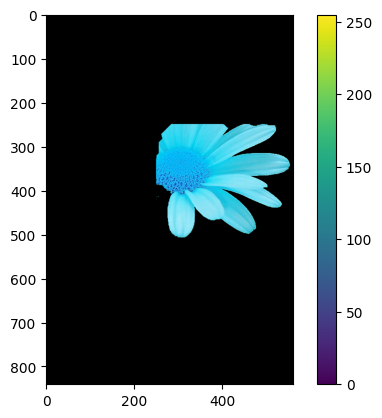

(<matplotlib.image.AxesImage at 0x123eb7a9650>,
 None)

In [76]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('C:/Users/Dell/.ipython/daisy.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"
mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (250,250,400,400)
cv.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
plt.imshow(img),plt.colorbar(),plt.show()

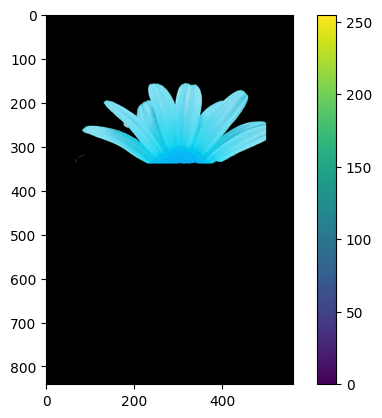

(<matplotlib.image.AxesImage at 0x123ecc37390>,
 None)

In [67]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
# newmask is the mask image I manually labelled
newmask = cv.imread('C:/Users/Dell/.ipython/daisy.jpg', cv.IMREAD_GRAYSCALE)
assert newmask is not None, "file could not be read, check with os.path.exists()"
# wherever it is marked white (sure foreground), change mask=1
# wherever it is marked black (sure background), change mask=0
mask[newmask == 0] = 0
mask[newmask == 255] = 1
mask, bgdModel, fgdModel = cv.grabCut(img,mask,None,bgdModel,fgdModel,5,cv.GC_INIT_WITH_MASK)
mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask[:,:,np.newaxis]
plt.imshow(img),plt.colorbar(),plt.show()

In [1]:
import numpy as np
import cv2
import sys

BLUE = [255,0,0]        # rectangle color
RED = [0,0,255]         # PR BG
GREEN = [0,255,0]       # PR FG
BLACK = [0,0,0]         # sure BG
WHITE = [255,255,255]   # sure FG

DRAW_BG = {'color' : BLACK, 'val' : 0}
DRAW_FG = {'color' : WHITE, 'val' : 1}
DRAW_PR_FG = {'color' : GREEN, 'val' : 3}
DRAW_PR_BG = {'color' : RED, 'val' : 2}

# setting up flags
rect = (0,0,1,1)
drawing = False         # flag for drawing curves
rectangle = False       # flag for drawing rect
rect_over = False       # flag to check if rect drawn
rect_or_mask = 100      # flag for selecting rect or mask mode
value = DRAW_FG         # drawing initialized to FG
thickness = 3           # brush thickness

def onmouse(event,x,y,flags,param):
    global img,img2,drawing,value,mask,rectangle,rect,rect_or_mask,ix,iy,rect_over

    # Draw Rectangle
    if event == cv2.EVENT_RBUTTONDOWN:
        rectangle = True
        ix,iy = x,y

    elif event == cv2.EVENT_MOUSEMOVE:
        if rectangle == True:
            img = img2.copy()
            cv2.rectangle(img,(ix,iy),(x,y),BLUE,2)
            rect = (min(ix,x),min(iy,y),abs(ix-x),abs(iy-y))
            rect_or_mask = 0

    elif event == cv2.EVENT_RBUTTONUP:
        rectangle = False
        rect_over = True
        cv2.rectangle(img,(ix,iy),(x,y),BLUE,2)
        rect = (min(ix,x),min(iy,y),abs(ix-x),abs(iy-y))
        rect_or_mask = 0
        print(" Now press the key 'n' a few times until no further change \n")

    # draw touchup curves

    if event == cv2.EVENT_LBUTTONDOWN:
        if rect_over == False:
            print("first draw rectangle \n")
        else:
            drawing = True
            cv2.circle(img,(x,y),thickness,value['color'],-1)
            cv2.circle(mask,(x,y),thickness,value['val'],-1)

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            cv2.circle(img,(x,y),thickness,value['color'],-1)
            cv2.circle(mask,(x,y),thickness,value['val'],-1)

    elif event == cv2.EVENT_LBUTTONUP:
        if drawing == True:
            drawing = False
            cv2.circle(img,(x,y),thickness,value['color'],-1)
            cv2.circle(mask,(x,y),thickness,value['val'],-1)

if __name__ == '__main__':

    # print documentation
    print(__doc__)

    # Loading images
    if len(sys.argv) == 2:
        filename = sys.argv[1] # for drawing purposes
    else:
        print("No input image given, so loading default image, ../data/lena.jpg \n")
        print("Correct Usage: python grabcut.py <filename> \n")
        filename = 'C:/Users/Dell/.ipython/daisy.jpg'

    img = cv2.imread(filename)
    img2 = img.copy()                               # a copy of original image
    mask = np.zeros(img.shape[:2],dtype = np.uint8) # mask initialized to PR_BG
    output = np.zeros(img.shape,np.uint8)           # output image to be shown

    # input and output windows
    cv2.namedWindow('output')
    cv2.namedWindow('input')
    cv2.setMouseCallback('input',onmouse)
    cv2.moveWindow('input',img.shape[1]+10,90)

    print(" Instructions: \n")
    print(" Draw a rectangle around the object using right mouse button \n")

    while(1):

        cv2.imshow('output',output)
        cv2.imshow('input',img)
        k = cv2.waitKey(1)

        # key bindings
        if k == 27:         # esc to exit
            break
        elif k == ord('0'): # BG drawing
            print(" mark background regions with left mouse button \n")
            value = DRAW_BG
        elif k == ord('1'): # FG drawing
            print(" mark foreground regions with left mouse button \n")
            value = DRAW_FG
        elif k == ord('2'): # PR_BG drawing
            value = DRAW_PR_BG
        elif k == ord('3'): # PR_FG drawing
            value = DRAW_PR_FG
        elif k == ord('s'): # save image
            bar = np.zeros((img.shape[0],5,3),np.uint8)
            res = np.hstack((img2,bar,img,bar,output))
            cv2.imwrite('grabcut_output.png',res)
            print(" Result saved as image \n")
        elif k == ord('r'): # reset everything
            print("resetting \n")
            rect = (0,0,1,1)
            drawing = False
            rectangle = False
            rect_or_mask = 100
            rect_over = False
            value = DRAW_FG
            img = img2.copy()
            mask = np.zeros(img.shape[:2],dtype = np.uint8) # mask initialized to PR_BG
            output = np.zeros(img.shape,np.uint8)           # output image to be shown
        elif k == ord('n'): # segment the image
            print(""" For finer touchups, mark foreground and background after pressing keys 0-3
            and again press 'n' \n""")
            if (rect_or_mask == 0):         # grabcut with rect
                bgdmodel = np.zeros((1,65),np.float64)
                fgdmodel = np.zeros((1,65),np.float64)
                cv2.grabCut(img2,mask,rect,bgdmodel,fgdmodel,1,cv2.GC_INIT_WITH_RECT)
                rect_or_mask = 1
            elif rect_or_mask == 1:         # grabcut with mask
                bgdmodel = np.zeros((1,65),np.float64)
                fgdmodel = np.zeros((1,65),np.float64)
                cv2.grabCut(img2,mask,rect,bgdmodel,fgdmodel,1,cv2.GC_INIT_WITH_MASK)

        mask2 = np.where((mask==1) + (mask==3),255,0).astype('uint8')
        output = cv2.bitwise_and(img2,img2,mask=mask2)

    cv2.destroyAllWindows()

Automatically created module for IPython interactive environment
No input image given, so loading default image, ../data/lena.jpg 

Correct Usage: python grabcut.py <filename> 

 Instructions: 

 Draw a rectangle around the object using right mouse button 

 Now press the key 'n' a few times until no further change 

 For finer touchups, mark foreground and background after pressing keys 0-3
            and again press 'n' 

 mark background regions with left mouse button 

 mark background regions with left mouse button 

 mark foreground regions with left mouse button 

 mark foreground regions with left mouse button 

 mark foreground regions with left mouse button 

 mark foreground regions with left mouse button 

 mark foreground regions with left mouse button 

 mark foreground regions with left mouse button 

 mark foreground regions with left mouse button 

 For finer touchups, mark foreground and background after pressing keys 0-3
            and again press 'n' 

 Now press 

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\grabcut.cpp:386: error: (-215:Assertion failed) !bgdSamples.empty() && !fgdSamples.empty() in function 'initGMMs'


: 